### Importing necessary libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
# loading the data into a Pandas DataFrame
data = pd.read_csv("prediction_dataset.csv")

### Reading and cleaning the data

In [48]:
data.head()

,experience,test_score,interview_score,Salary
0,eight,8.0,50000.0,NaN
1,five,4.0,22000.0,NaN
2,three,6.0,5.0,30000.0
3,five,9.0,9.0,55000.0
4,six,3.0,5.0,13000.0


In [49]:
#finding the shape of the data
data.shape

(20, 4)

In [50]:
#sorting the Salary data in an ascending order
data.sort_values("Salary")

,experience,test_score,interview_score,Salary
7,one,1.0,2.0,500.0
14,six,5.0,NaN,8000.0
4,six,3.0,5.0,13000.0
18,three,5.0,5.0,20000.0
10,ten,NaN,5.0,25000.0
12,one,3.0,6.0,25000.0
2,three,6.0,5.0,30000.0
19,five,6.0,7.0,35000.0
13,four,5.0,4.0,36000.0
9,thirteen,7.5,7.5,45000.0


In [51]:
#sorting the Years of experience in ascending order
data.sort_values('experience')

,experience,test_score,interview_score,Salary
0,eight,8.0,50000.0,NaN
15,eleven,9.0,8.0,55000.0
8,fifteen,9.0,9.0,60000.0
19,five,6.0,7.0,35000.0
1,five,4.0,22000.0,NaN
3,five,9.0,9.0,55000.0
13,four,5.0,4.0,36000.0
7,one,1.0,2.0,500.0
11,one,1.0,500.0,NaN
12,one,3.0,6.0,25000.0


In [52]:
# removing the rows with empty cells
data.dropna()

,experience,test_score,interview_score,Salary
2,three,6.0,5.0,30000.0
3,five,9.0,9.0,55000.0
4,six,3.0,5.0,13000.0
6,ten,8.0,6.0,48000.0
7,one,1.0,2.0,500.0
8,fifteen,9.0,9.0,60000.0
9,thirteen,7.5,7.5,45000.0
12,one,3.0,6.0,25000.0
13,four,5.0,4.0,36000.0
15,eleven,9.0,8.0,55000.0


In [53]:
# removing the duplicates in the dataset
data.drop_duplicates()

,experience,test_score,interview_score,Salary
0,eight,8.0,50000.0,NaN
1,five,4.0,22000.0,NaN
2,three,6.0,5.0,30000.0
3,five,9.0,9.0,55000.0
4,six,3.0,5.0,13000.0
5,two,1.0,9000.0,NaN
6,ten,8.0,6.0,48000.0
7,one,1.0,2.0,500.0
8,fifteen,9.0,9.0,60000.0
9,thirteen,7.5,7.5,45000.0


In [54]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### Visualization of the dataset to understand the data in a clearer way

/var/folders/_f/41s_nqn93159pg5sr54x81qh0000gn/T/ipykernel_9310/2789595363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['test_score'],kde=False,bins=10)


<Axes: xlabel='test_score'>

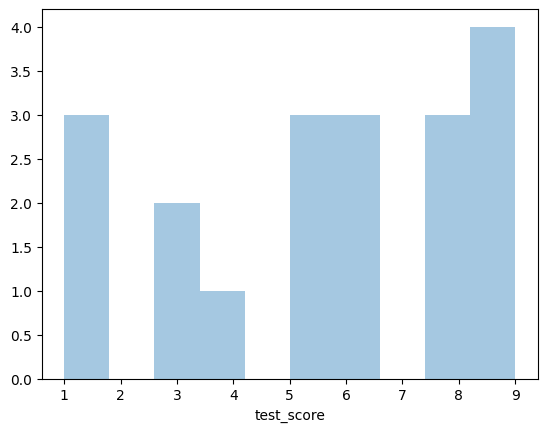

In [55]:
sns.distplot(data['test_score'],kde=False,bins=10)

<Axes: xlabel='count', ylabel='interview_score'>

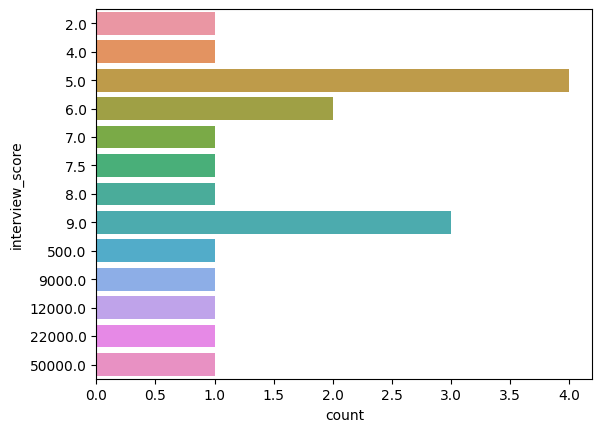

In [56]:
#shows the counts of observations in each categorical bin using bars
sns.countplot(y='interview_score',data=data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='experience', ylabel='Salary'>

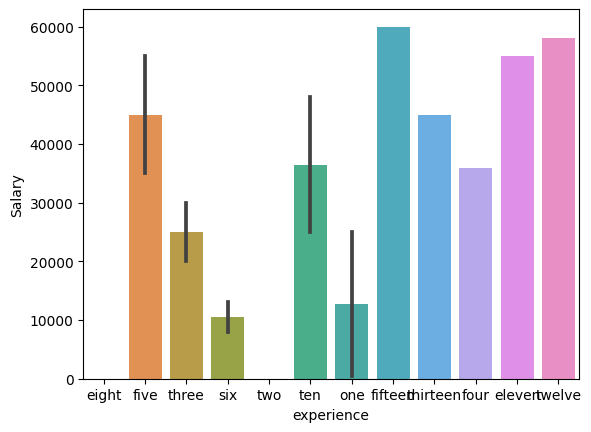

In [57]:
sns.barplot(x='experience',y='Salary',data=data)

/var/folders/_f/41s_nqn93159pg5sr54x81qh0000gn/T/ipykernel_9310/117955240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

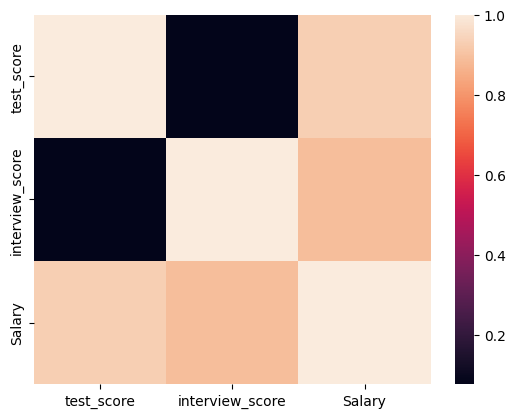

In [58]:
#represents the correlation of data in the columns using a heatmap
sns.heatmap(data.corr())

/var/folders/_f/41s_nqn93159pg5sr54x81qh0000gn/T/ipykernel_9310/2009633111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

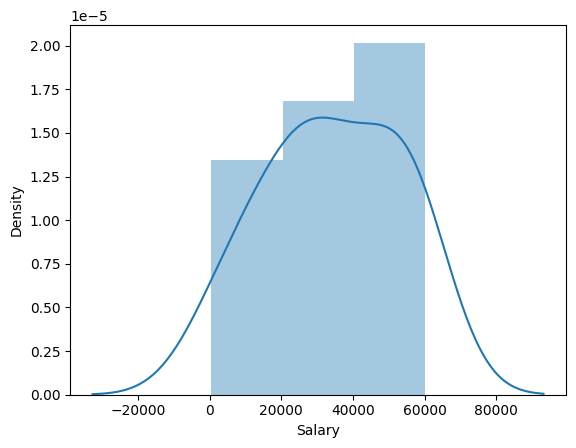

In [59]:
sns.distplot(data.Salary)

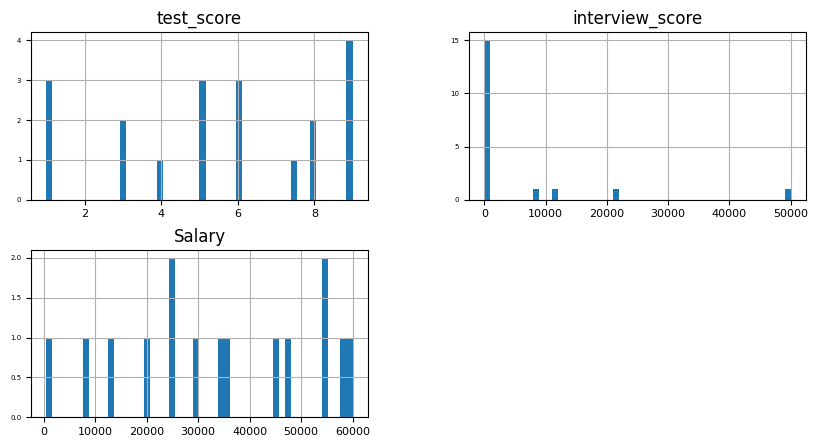

In [60]:
#plotting the distribution of the numerical features with a histogram
data.hist(figsize=(10, 5), bins=50, xlabelsize=8, ylabelsize=5);


### Training and testing

In [61]:
#splitting the data into training and testng sets
X_train, X_test, y_train, y_test = train_test_split(data["experience"], data["Salary"], test_size=0.2, random_state=0)

In [62]:
# creating a linear regression model
model = LinearRegression()

In [63]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'ten'